In [1]:
import numpy as np
import pandas as pd

In [2]:
data1 = pd.read_csv('/Users/akashvarun/Documents/Boston/INFO 6105/Assignments/Assignment 3/Adult/test1.csv')
data1.shape
data2 = pd.read_csv('/Users/akashvarun/Documents/Boston/INFO 6105/Assignments/Assignment 3/Adult/test2.csv')
data2.shape
data3 = pd.read_csv('/Users/akashvarun/Documents/Boston/INFO 6105/Assignments/Assignment 3/Adult/test3.csv')
data3.shape
data4 = pd.read_csv('/Users/akashvarun/Documents/Boston/INFO 6105/Assignments/Assignment 3/Adult/test4.csv')
data4.shape
data5 = pd.read_csv('/Users/akashvarun/Documents/Boston/INFO 6105/Assignments/Assignment 3/Adult/test5.csv')
data5.shape
data6 = pd.read_csv('/Users/akashvarun/Documents/Boston/INFO 6105/Assignments/Assignment 3/Adult/test6.csv')
data6.shape
data7 = pd.read_csv('/Users/akashvarun/Documents/Boston/INFO 6105/Assignments/Assignment 3/Adult/test7.csv')
data7.shape

(760, 22)

In [3]:
datasets = [data1,data2,data3,data4,data5,data6,data7]

merged_df = pd.concat(datasets, ignore_index=True)

In [4]:
merged_df

,asin,product_title,average_rating,total_reviews,review_author,author_badge,badge,reviewed_product_attribute,reviewed_variant_asin,variant_review_url,...,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url,input
0,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Thomas B.,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"These works great, I think the gel capsule dis...",NaN,Max dose and it hits faster than other quick r...,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R34...,B00K8K937I
1,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Andie Allday,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,Powerful! Will knock you right out!,NaN,Powerful!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1R...,B00K8K937I
2,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,douglas w smith,NaN,Verified Purchase,Size: 120 Count (Pack of 2),B00K8K937I,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Best melatonin I've tried,so much better then ...",NaN,Amazing,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R1K...,B00K8K937I
3,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Amazon Customer,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"Works like a charm, great price.",NaN,Five Stars,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R4D...,B00K8K937I
4,B00K8K937I,Puritan's Pride Super Strength Rapid Release C...,4.6,3273,Leslie Masters,NaN,Verified Purchase,Size: 120 Count (Pack of 1),B004R66PVG,https://www.amazon.com/Puritans-Pride-Strength...,...,United States,"I love this product, I use it to sleep at nigh...",NaN,"This is one great product, people should try it.",NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B00K8K9...,Puritan's Pride,https://www.amazon.com/gp/customer-reviews/R2F...,B00K8K937I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15905,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,LUCI BATES,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,They taste and work great!!!! Fall asleep pret...,NaN,They work Great!!!!,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/RVU...,B08451719W
15906,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Precola,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,They weren’t the best tasting. But they worked...,NaN,Tastes gross,NaN,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R2E...,B08451719W
15907,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Ashley McCann Apostle,NaN,Verified Purchase,NaN,NaN,NaN,...,United States,I usually buy the Puritans Pride 10mg capsules...,NaN,Don't work for me,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B084517...,Carlyle,https://www.amazon.com/gp/customer-reviews/R31...,B08451719W
15908,B08451719W,Carlyle Melatonin 12 mg Fast Dissolve 300 Tabl...,4.7,768,Sharper Shopper,NaN,Verified Purc

In [5]:
for col in merged_df.columns:
    print(col)

asin
product_title
average_rating
total_reviews
review_author
author_badge
badge
reviewed_product_attribute
reviewed_variant_asin
variant_review_url
review_rating
review_date
reviewed_country
review_text
review_comment_count
review_header
no_of_people_reacted_helpful
author_profile_url
url
brand
review_url
input


In [6]:

# Remove unnecessary features
columns_to_drop = [
    'asin',
    'review_author',
    'author_badge',
    'badge',
    'reviewed_product_attribute',
    'reviewed_variant_asin',
    'variant_review_url',
    'review_date',
    'reviewed_country',
    'review_comment_count',
    'review_header',
    'no_of_people_reacted_helpful',
    'author_profile_url',
    'url',
    'brand',
    'review_url'
]

merged_df = merged_df.drop(columns=columns_to_drop, axis=1)

# Add a 'dose' column by extracting information from 'product_title'
merged_df['dose'] = merged_df['product_title'].str.extract('(\d+)mg')

# Display the DataFrame to verify the changes
print(merged_df.head())


                                       product_title  average_rating  \
0  Puritan's Pride Super Strength Rapid Release C...             4.6   
1  Puritan's Pride Super Strength Rapid Release C...             4.6   
2  Puritan's Pride Super Strength Rapid Release C...             4.6   
3  Puritan's Pride Super Strength Rapid Release C...             4.6   
4  Puritan's Pride Super Strength Rapid Release C...             4.6   

   total_reviews  review_rating  \
0           3273              4   
1           3273              4   
2           3273              5   
3           3273              5   
4           3273              5   

                                         review_text       input dose  
0  These works great, I think the gel capsule dis...  B00K8K937I  NaN  
1                Powerful! Will knock you right out!  B00K8K937I  NaN  
2  Best melatonin I've tried,so much better then ...  B00K8K937I  NaN  
3                   Works like a charm, great price.  B00K8K937I  Na

In [7]:
merged_df = merged_df.dropna()

In [8]:
merged_df.head()

,product_title,average_rating,total_reviews,review_rating,review_text,input,dose
8200,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,2,I managed to force down a couple of gummies an...,B07N46LTJJ,1
8201,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,3,I’ve heard so many good things about this prod...,B07N46LTJJ,1
8202,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,1,"The first ingredients are ""Corn syrup, water a...",B07N46LTJJ,1
8203,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,5,Product works! End up getting sleepy like boo ...,B07N46LTJJ,1
8204,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",4.5,1316,5,You go to sleep very quickly!,B07N46LTJJ,1


In [9]:
from textblob import TextBlob

# Assuming 'product_title' contains dose information
merged_df['dose'] = merged_df['product_title'].str.extract('(\d+)mg')

# Define a function for sentiment analysis using TextBlob
def analyze_sentiment(text):
    # Handle missing values
    if pd.isnull(text):
        return 'unknown'

    analysis = TextBlob(str(text))
    # Classify the polarity as positive, neutral, or negative
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis to the 'review_rating' column for each dose
merged_df['sentiment'] = merged_df['review_rating'].apply(analyze_sentiment)

# Display the DataFrame with dose and sentiment information
print(merged_df[['dose', 'review_rating', 'sentiment']].head())


     dose  review_rating sentiment
8200    1              2   neutral
8201    1              3   neutral
8202    1              1   neutral
8203    1              5   neutral
8204    1              5   neutral


In [10]:
import pandas as pd
from nltk.corpus import stopwords
import string

# Assuming 'review_text' is the column to be analyzed
merged_df['clean_text'] = merged_df['review_text'].apply(lambda x: str(x).lower() if pd.notnull(x) else '')

# Remove punctuation
merged_df['clean_text'] = merged_df['clean_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Remove stop words
stop_words = set(stopwords.words('english'))
merged_df['clean_text'] = merged_df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['clean_text'])

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display top TF-IDF words
print(feature_names)


['10' '100' '10mg' '12' '13' '14' '140' '15' '20' '2030' '20mg' '23' '2nd'
 '30' '34' '3rd' '40' '45' '5mg' '90' 'ability' 'able' 'absolutely'
 'acting' 'actual' 'actually' 'add' 'added' 'addition' 'adult'
 'advertised' 'advertising' 'affect' 'affects' 'aftertaste' 'ago' 'aid'
 'aide' 'aids' 'al' 'alarm' 'alert' 'allow' 'allows' 'almost' 'alone'
 'along' 'already' 'also' 'alternative' 'although' 'always' 'amazing'
 'amazon' 'ambien' 'amount' 'another' 'anxiety' 'anymore' 'anyone'
 'anything' 'anyway' 'apparently' 'aren' 'arent' 'around' 'arrived'
 'artificial' 'ask' 'asleep' 'ate' 'available' 'awake' 'away' 'awesome'
 'awful' 'awhile' 'baby' 'back' 'bad' 'barely' 'based' 'basically' 'batch'
 'batches' 'bathroom' 'bc' 'bears' 'beat' 'become' 'bed' 'bedtime'
 'believe' 'benadryl' 'berry' 'best' 'better' 'beware' 'bien' 'big'
 'bigger' 'bit' 'bitter' 'body' 'bottle' 'bottles' 'bought' 'boyfriend'
 'brain' 'brand' 'brands' 'break' 'brush' 'buen' 'bueno' 'bunch' 'buy'
 'buying' 'call' 'came

In [12]:
from nltk import FreqDist

# Assuming 'dose' column is already created
dose_groups = merged_df.groupby('dose')

# Analyze frequency distribution of words for each dose
for dose, group in dose_groups:
    text_concatenated = ' '.join(group['clean_text'])
    words = text_concatenated.split()
    freq_dist = FreqDist(words)
    
    # Display top words for each dose
    print(f"\nTop words for dose {dose}:")
    print(freq_dist.most_common(10))



Top words for dose 1:
[('sleep', 736), ('work', 324), ('asleep', 306), ('taste', 279), ('take', 269), ('night', 243), ('like', 232), ('good', 226), ('gummies', 224), ('product', 222)]

Top words for dose 10:
[('sleep', 1126), ('taste', 706), ('gummies', 607), ('great', 590), ('work', 590), ('like', 514), ('good', 511), ('asleep', 505), ('take', 504), ('melatonin', 486)]

Top words for dose 20:
[('sleep', 308), ('product', 188), ('melatonin', 182), ('works', 170), ('taste', 164), ('good', 157), ('work', 143), ('great', 142), ('take', 126), ('like', 119)]


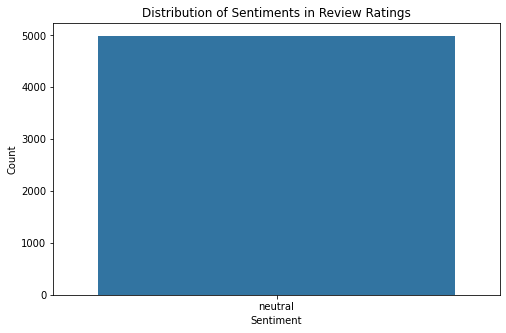

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=merged_df)
plt.title('Distribution of Sentiments in Review Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


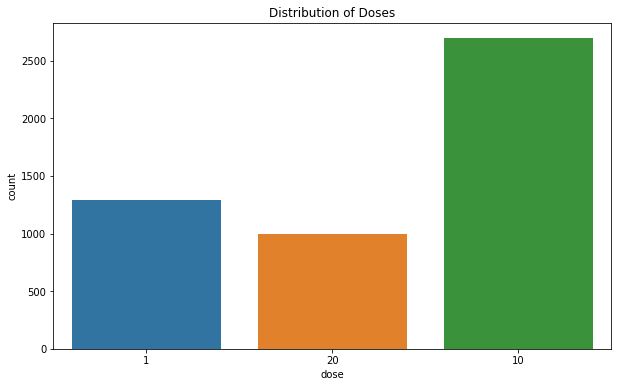

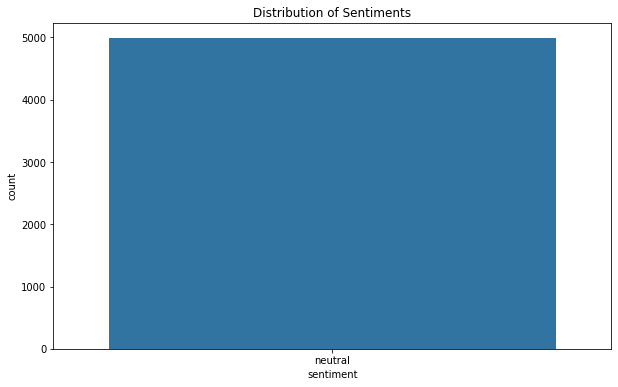

In [14]:
import seaborn as sns
# Distribution of Doses
plt.figure(figsize=(10, 6))
sns.countplot(x='dose', data=merged_df)
plt.title('Distribution of Doses')
plt.show()

# Sentiment Analysis Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=merged_df)
plt.title('Distribution of Sentiments')
plt.show()


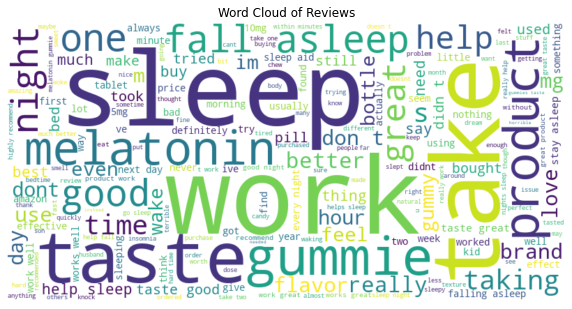

In [15]:
from wordcloud import WordCloud

# Concatenate all reviews
all_reviews_text = ' '.join(merged_df['clean_text'].dropna())

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a custom list of stopwords
custom_stopwords = ['i', 'the', 'is', 'etc', 'and', 'but', 'so', 'on']  # Add more as needed

# Update the 'clean_text' column to remove stopwords
merged_df['clean_text'] = merged_df['review_text'].apply(
    lambda x: ' '.join([word for word in str(x).lower().split() if word not in custom_stopwords])
)

# Define a list of useful hot words
hot_words = ['good sleep', 'dissolve', 'tasty', 'helpful', 'no help']  # Add more as needed

# Extract and analyze words related to hot words
for hot_word in hot_words:
    merged_df[hot_word.replace(' ', '_')] = merged_df['clean_text'].apply(lambda x: hot_word.lower() in x)

# Display the DataFrame with new columns for hot words
print(merged_df[['clean_text'] + [hot_word.replace(' ', '_') for hot_word in hot_words]].head())


                                             clean_text  good_sleep  dissolve  \
8200  managed to force down a couple of gummies got ...       False     False   
8201  i’ve heard many good things about this product...       False     False   
8202  first ingredients are "corn syrup, water sugar...       False     False   
8203  product works! end up getting sleepy like boo ...       False     False   
8204                      you go to sleep very quickly!       False     False   

      tasty  helpful  no_help  
8200  False    False    False  
8201  False    False    False  
8202  False    False    False  
8203  False    False    False  
8204  False    False    False  


In [17]:
# TF-IDF analysis
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['clean_text'])

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display top TF-IDF words
print("Top TF-IDF Words:")
print(feature_names)

Top TF-IDF Words:
['00' '10' '100' '10mg' '12' '140' '15' '20' '20mg' '2nd' '30' '3rd' '40'
 '45' '5mg' '60' '90' 'ability' 'able' 'about' 'absolutely' 'acting'
 'actual' 'actually' 'add' 'added' 'adult' 'advertised' 'advertising'
 'affect' 'affects' 'after' 'aftertaste' 'again' 'ago' 'aid' 'aids' 'al'
 'alarm' 'alert' 'all' 'allow' 'allows' 'almost' 'alone' 'along' 'already'
 'also' 'alternative' 'although' 'always' 'am' 'amazing' 'amazon' 'ambien'
 'amount' 'an' 'and' 'another' 'anxiety' 'any' 'anymore' 'anyone'
 'anything' 'anyway' 'are' 'aren' 'around' 'arrived' 'artificial' 'as'
 'ask' 'asleep' 'at' 'ate' 'auto' 'available' 'awake' 'away' 'awesome'
 'awful' 'awhile' 'baby' 'back' 'bad' 'based' 'basically' 'batch'
 'batches' 'bathroom' 'be' 'bears' 'because' 'become' 'bed' 'bedtime'
 'been' 'before' 'being' 'believe' 'benadryl' 'berry' 'best' 'better'
 'between' 'beware' 'bien' 'big' 'bit' 'bitter' 'body' 'both' 'bottle'
 'bottles' 'bought' 'boyfriend' 'brain' 'brand' 'brands' 'bre

In [18]:
# Display the DataFrame with doses and TF-IDF scores
print("TF-IDF Matrix:")
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df['dose'] = merged_df['dose']
print(tfidf_df.head())

TF-IDF Matrix:
    00   10  100  10mg   12  140   15   20  20mg  2nd  ...  wrong  year  \
0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   0.0   
1  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   0.0   
2  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   0.0   
3  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   0.0   
4  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0   0.0   

   years  yes  yet       you  your  yummy  zero  zzzquil  
0    0.0  0.0  0.0  0.000000   0.0    0.0   0.0      0.0  
1    0.0  0.0  0.0  0.000000   0.0    0.0   0.0      0.0  
2    0.0  0.0  0.0  0.000000   0.0    0.0   0.0      0.0  
3    0.0  0.0  0.0  0.000000   0.0    0.0   0.0      0.0  
4    0.0  0.0  0.0  0.372119   0.0    0.0   0.0      0.0  

[5 rows x 1000 columns]


In [19]:
# TF-IDF analysis
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['clean_text'])

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame with TF-IDF scores and doses
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df['dose'] = merged_df['dose']

# Group by dose and calculate mean TF-IDF scores
mean_tfidf_by_dose = tfidf_df.groupby('dose').mean()

# Plot bar plots for each dose
for dose in mean_tfidf_by_dose.index:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=mean_tfidf_by_dose.columns, y=mean_tfidf_by_dose.loc[dose])
    plt.title(f'Top Words TF-IDF Scores for {dose}')
    plt.xticks(rotation=45)
    plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have the 'clean_text' column and 'dose' column in your DataFrame

# Encode doses as numerical labels
merged_df['dose_label'] = merged_df['dose'].astype('category').cat.codes

# Features (X) and labels (y)
X = tfidf_matrix  # Using TF-IDF matrix as features
y = merged_df['dose_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Model 1: Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_predictions))

# Classification Report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

Logistic Regression Accuracy: 0.594188376753507

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.29      0.37       274
           1       0.61      0.86      0.71       530
           2       0.64      0.29      0.40       194

    accuracy                           0.59       998
   macro avg       0.58      0.48      0.49       998
weighted avg       0.59      0.59      0.56       998



In [22]:
# Model 2: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

# Classification Report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.5731462925851704

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.12      0.19       274
           1       0.57      0.91      0.71       530
           2       0.67      0.29      0.40       194

    accuracy                           0.57       998
   macro avg       0.56      0.44      0.43       998
weighted avg       0.56      0.57      0.50       998

